In [ ]:
# !gdown https://universe.roboflow.com/ds/NUVUNKCLdy?key=9ApDMtb5D2

Downloading...
From: https://universe.roboflow.com/ds/NUVUNKCLdy?key=9ApDMtb5D2
To: /content/NUVUNKCLdy?key=9ApDMtb5D2
100% 49.0M/49.0M [00:00<00:00, 114MB/s]


In [ ]:
# !unzip NUVUNKCLdy?key=9ApDMtb5D2

### 데이터 프로세싱

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import glob
import xml.etree.ElementTree as ET

# 함수 가져오기 

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            bbx = member.find('bndbox')
            xmin = int(bbx.find('xmin').text)
            ymin = int(bbx.find('ymin').text)
            xmax = int(bbx.find('xmax').text)
            ymax = int(bbx.find('ymax').text)
            label = member.find('name').text

            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     label,
                     xmin,
                     ymin,
                     xmax,
                     ymax
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [ ]:
IMAGE_PATH = '/content'

In [ ]:
import os
xml_df = xml_to_csv(os.path.join(IMAGE_PATH,'train'))
xml_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,IMG_5491_mp4-12_jpg.rf.009ecd8c6f6f7c9bca9a13a...,320,320,face,297,62,321,207
1,mask-no-mask_mov-9_jpg.rf.b759225f2d3dcb787f13...,320,320,face,53,129,289,249
2,mo-justin-mask-NoMask_mov-18_jpg.rf.88a4339fde...,320,320,face,36,113,134,185
3,mo-justin-mask-NoMask_mov-18_jpg.rf.88a4339fde...,320,320,face,211,120,315,192
4,Screen-Recording-2021-12-09-at-1_03_04-PM_mov-...,320,320,face,123,123,235,173


In [ ]:
images = xml_df.iloc[:,0].values
images[:5]

array(['IMG_5491_mp4-12_jpg.rf.009ecd8c6f6f7c9bca9a13af68e115dc.jpg',
       'mask-no-mask_mov-9_jpg.rf.b759225f2d3dcb787f13f4d7e4a507ab.jpg',
       'mo-justin-mask-NoMask_mov-18_jpg.rf.88a4339fdee6f69342dee751542d788c.jpg',
       'mo-justin-mask-NoMask_mov-18_jpg.rf.88a4339fdee6f69342dee751542d788c.jpg',
       'Screen-Recording-2021-12-09-at-1_03_04-PM_mov-58_jpg.rf.216616a92f87d8823a88512414078451.jpg'],
      dtype=object)

In [ ]:
points = xml_df.iloc[:,4:].values
points

array([[297,  62, 321, 207],
       [ 53, 129, 289, 249],
       [ 36, 113, 134, 185],
       ...,
       [ 86,  67, 221, 143],
       [  1, 122,   9, 288],
       [129,  76, 242, 288]])

In [ ]:
import PIL

dataset_images = []
dataset_bbs = []

for file,point in zip(images,points) :
  f = os.path.join(IMAGE_PATH,'train',file)
  image = PIL.Image.open(f)
  arr = np.array(image)
  dataset_images.append(arr)
  dataset_bbs.append(point)

dataset_images = np.array(dataset_images)
dataset_bbs = np.array(dataset_bbs) 

In [ ]:
# 4개 바운딩박스, 224,224,3 이미지 크기
dataset_bbs.shape,dataset_images.shape

((4868, 4), (4868, 320, 320, 3))

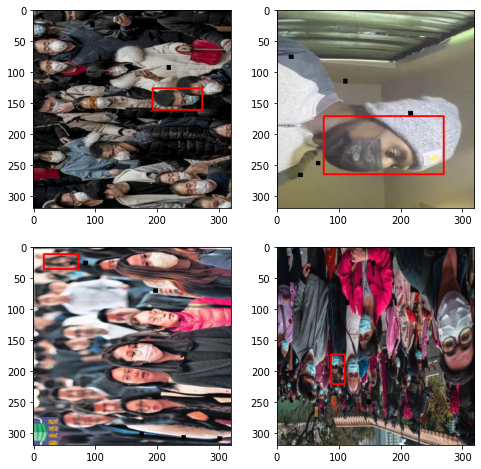

In [ ]:
import cv2

samples = np.random.randint(dataset_images.shape[0],size=4)
plt.figure(figsize=(8,8))
for i,idx in enumerate(samples):
  # x,y x,y 로 묶을려고
  points = dataset_bbs[idx].reshape(2,2)
  
  img = cv2.rectangle(dataset_images[idx].copy(),
                      tuple(points[0]),
                      tuple(points[1]),
                      color=(255,0,0),
                      thickness=2)
  plt.subplot(2,2,i+1)
  plt.imshow(img)
plt.show()